<a href="https://colab.research.google.com/github/RafiShiddik/Visualisasi-Data-in-Python/blob/main/Day_10_Hypothesis_Testing_Concepts_Achmad_Rafi_Shiddik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

# ***Load Data***

In [ ]:
df = pd.read_csv('/content/marketing_campaign.csv', sep="\t") #sep = \t befungis untuk mengatur tab pada data set dikarenakan ketikan tidak dikasih tab data set tidak dapat dibaca dnegan sempurna
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# ***Data Description***
🟢 Informasi Umum Pelanggan
ID (int64) - Identifikasi unik untuk setiap pelanggan.

Year_Birth (int64) - Tahun kelahiran pelanggan. Bisa digunakan untuk menghitung usia.

Education (object) - Tingkat pendidikan pelanggan (misalnya Graduate, PhD, Master).

Marital_Status (object) - Status pernikahan pelanggan (Single, Married, Divorced, etc.).

Income (float64) - Pendapatan tahunan pelanggan. Ada 24 nilai yang hilang (karena Non-Null Count = 2216, bukan 2240).

🟢 Informasi Keluarga

Kidhome (int64) - Jumlah anak kecil (balita) di rumah.

Teenhome (int64) - Jumlah remaja di rumah.

🟢 Informasi Keanggotaan & Interaksi

Dt_Customer (datetime64[ns]) - Tanggal pelanggan pertama kali menjadi anggota (bergabung dengan program).

Recency (int64) - Jumlah hari sejak pelanggan terakhir berinteraksi atau melakukan pembelian.

🟢 Pengeluaran dalam Berbagai Kategori Produk

MntWines (int64) - Total uang yang dihabiskan untuk produk Wine.

MntFruits (int64) - Total uang yang dihabiskan untuk buah-buahan.

MntMeatProducts (int64) - Total uang yang dihabiskan untuk daging.

MntFishProducts (int64) - Total uang yang dihabiskan untuk ikan dan seafood.

MntSweetProducts (int64) - Total uang yang dihabiskan untuk makanan manis.

MntGoldProds (int64) - Total uang yang dihabiskan untuk produk emas (jewelry, accessories).

🟢 Informasi Pembelian

NumDealsPurchases (int64) - Jumlah pembelian yang dilakukan dalam promosi diskon.

NumWebPurchases (int64) - Jumlah pembelian yang dilakukan melalui website.

NumCatalogPurchases (int64) - Jumlah pembelian melalui katalog.

NumStorePurchases (int64) - Jumlah pembelian langsung di toko.

NumWebVisitsMonth (int64) - Jumlah kunjungan ke situs web dalam sebulan terakhir.

🟢 Respons Terhadap Kampanye Pemasaran

AcceptedCmp1 - AcceptedCmp5 (int64) - Indikator (1=Ya, 0=Tidak) apakah

pelanggan menerima penawaran dalam lima kampanye pemasaran yang berbeda.

Response (int64) - Apakah pelanggan merespons kampanye terakhir (1=Ya, 0=Tidak).

🟢 Lain-lain

Complain (int64) - Apakah pelanggan pernah mengajukan keluhan (1=Ya, 0=Tidak).

Z_CostContact (int64) - Biaya tetap per kontak (mungkin untuk pemasaran, kemungkinan nilainya konstan).

Z_Revenue (int64) - Pendapatan tetap yang diperoleh per pelanggan.

In [ ]:
df.shape

(2240, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df['Dt_Customer']= pd.to_datetime(df['Dt_Customer'], format = "%d-%m-%Y") #mengubah type data tanggal menjadi datetime
df['Dt_Customer']

,Dt_Customer
0,2012-09-04
1,2014-03-08
2,2013-08-21
3,2014-02-10
4,2014-01-19
...,...
2235,2013-06-13
2236,2014-06-10
2237,2014-01-25
2238,2014-01-24


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [ ]:
df[['Income','Kidhome', 'Teenhome', 'MntWines', 'MntFruits',
    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].describe()

,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.444196,0.506250,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875
std,25173.076661,0.538398,0.544538,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35303.000000,0.000000,0.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000
50%,51381.500000,0.000000,0.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000
75%,68522.000000,1.000000,1.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000
max,666666.000000,2.000000,2.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000


# **Data Distribusi**

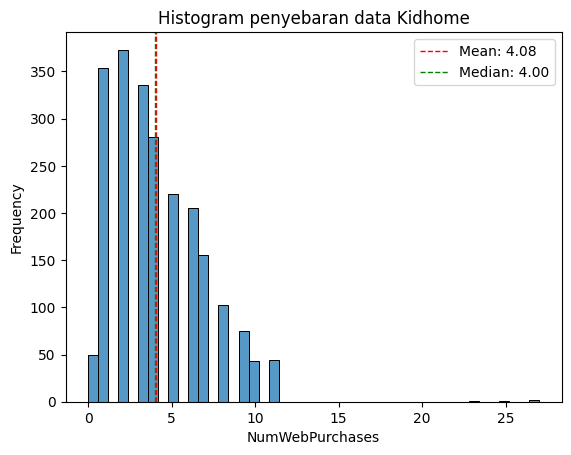

In [ ]:
#Histogram melihat apakah penyebaran data income sudah benar atau belum

sns.histplot(df['NumWebPurchases'])
plt.ylabel('Frequency')
plt.xlabel('NumWebPurchases')
plt.title('Histogram penyebaran data Kidhome')

mean_NumWebPurchases = df['NumWebPurchases'].mean()
plt.axvline(mean_NumWebPurchases, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_NumWebPurchases:.2f}')

median_NumWebPurchases = df['NumWebPurchases'].median()
plt.axvline(median_NumWebPurchases, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_NumWebPurchases:.2f}')

plt.legend()
plt.show()

dari sini terliihat bahwa pembelian via website seakwed ke kanan yang artinya data set tersebut cenderung di positif

Text(0.5, 1.0, 'Boxplot of Customer NumWebPurchases')

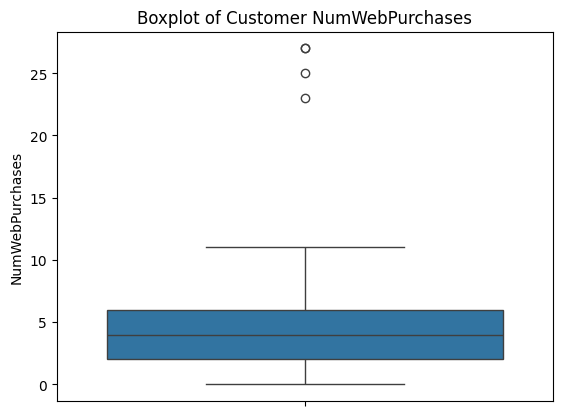

In [ ]:
# Boxplot
sns.boxplot(data=df, y="NumWebPurchases")
plt.ylabel('NumWebPurchases')
plt.title('Boxplot of Customer NumWebPurchases')

In [ ]:
df["NumWebPurchases"].mean()

4.084821428571429

In [ ]:
df["NumWebPurchases"].describe()

,NumWebPurchases
count,2240.000000
mean,4.084821
std,2.778714
min,0.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,27.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

df["NumWebPurchases_std"] = sc.fit_transform(df[["NumWebPurchases"]])

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,NumWebPurchases_std
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1.409304
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,-1.110409
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,1.409304
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,-0.750450
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,0.329427


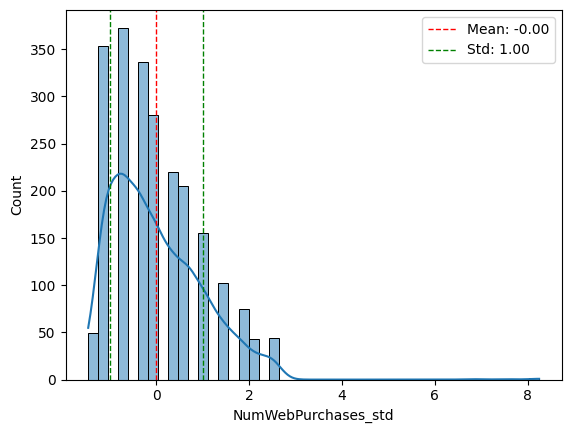

In [ ]:
sns.histplot(data=df, x="NumWebPurchases_std", kde=True)

mean_NumWebPurchases_std = df['NumWebPurchases_std'].mean()
plt.axvline(mean_NumWebPurchases_std, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_NumWebPurchases_std:.2f}')

std_NumWebPurchases_std = df['NumWebPurchases_std'].std()
plt.axvline(std_NumWebPurchases_std, color='green', linestyle='dashed', linewidth=1, label=f'Std: {std_NumWebPurchases_std:.2f}')
plt.axvline(-1 * std_NumWebPurchases_std, color='green', linestyle='dashed', linewidth=1)

plt.legend()
plt.show()

<Axes: xlabel='NumWebPurchases'>

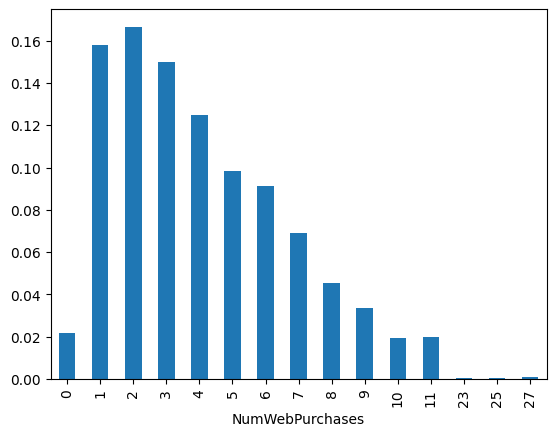

In [ ]:
customer_NumWebPurchases = df["NumWebPurchases"].value_counts(normalize=True)
customer_NumWebPurchases.sort_index(ascending=True).plot(kind="bar")

In [ ]:
df["Teenhome"].unique()

array([0, 1, 2])

In [ ]:
print(df.dtypes)
print(df.isnull().sum())

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [ ]:
NumWebPurchases_churn0 = df[df["Teenhome"] == 0]["NumWebPurchases"].value_counts(normalize=True) #ingin melihat pemebelian yang memiliki anak remaja 0

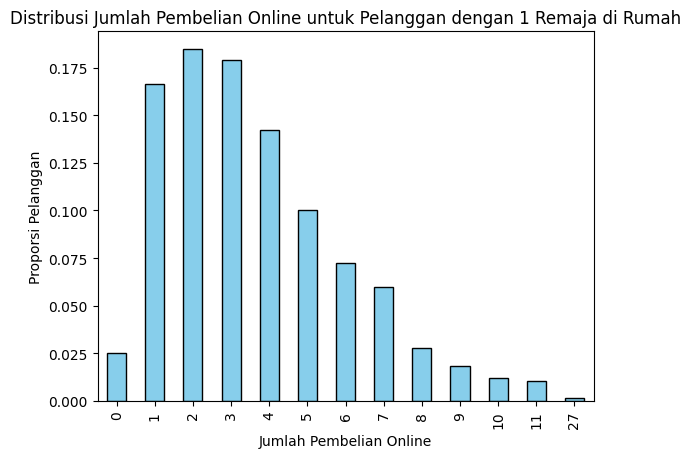

In [ ]:
NumWebPurchases_churn0.sort_index(ascending=True).plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Distribusi Jumlah Pembelian Online untuk Pelanggan dengan 1 Remaja di Rumah")
plt.xlabel("Jumlah Pembelian Online")
plt.ylabel("Proporsi Pelanggan")
plt.show()

In [ ]:
NumWebPurchases_churn1 = df[df["Teenhome"] == 1]["NumWebPurchases"].value_counts(normalize=True) #ingin melihat pemebelian yang memiliki anak remaja 1

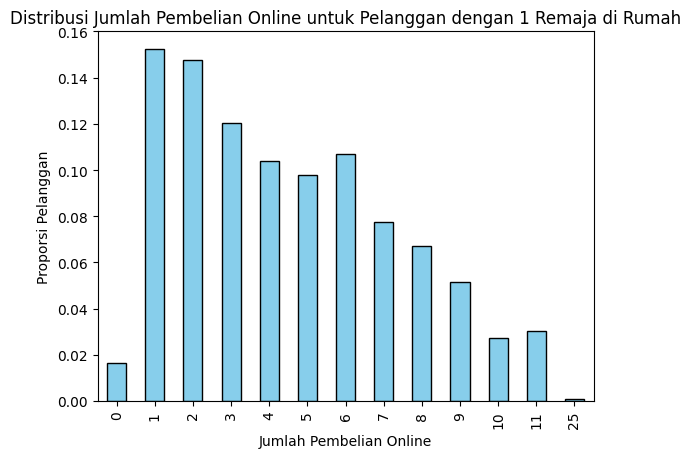

In [ ]:
NumWebPurchases_churn1.sort_index(ascending=True).plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Distribusi Jumlah Pembelian Online untuk Pelanggan dengan 1 Remaja di Rumah")
plt.xlabel("Jumlah Pembelian Online")
plt.ylabel("Proporsi Pelanggan")
plt.show()

In [ ]:
NumWebPurchases_churn2 = df[df["Teenhome"] == 2]["NumWebPurchases"].value_counts(normalize=True) #ingin melihat pemebelian yang memiliki anak remaja 1

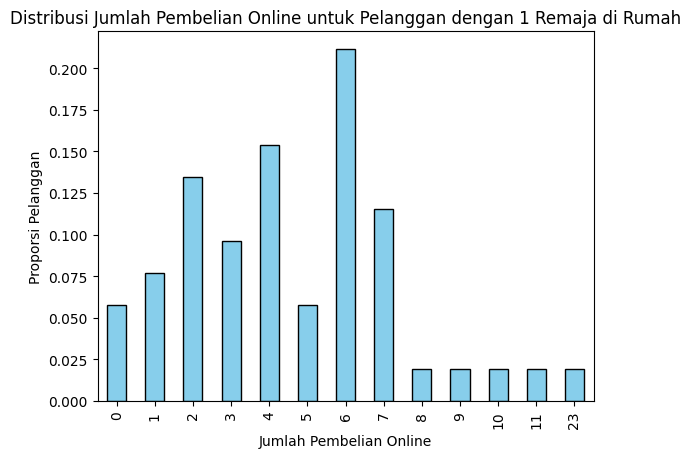

In [ ]:
NumWebPurchases_churn2.sort_index(ascending=True).plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Distribusi Jumlah Pembelian Online untuk Pelanggan dengan 1 Remaja di Rumah")
plt.xlabel("Jumlah Pembelian Online")
plt.ylabel("Proporsi Pelanggan")
plt.show()

In [ ]:
# Filter pelanggan dengan total anak 0-2 tahun
df_filtered = df[(df["Kidhome"] + df["Teenhome"]) <= 2]

# Hitung rata-rata pembelian via website
average_web_purchases = df_filtered["NumWebPurchases"].mean()

# Tampilkan hasil
print(f"Rata-rata pembelian via website pelanggan dengan anak 0-2 tahun: {average_web_purchases:.2f}")


Rata-rata pembelian via website pelanggan dengan anak 0-2 tahun: 4.11


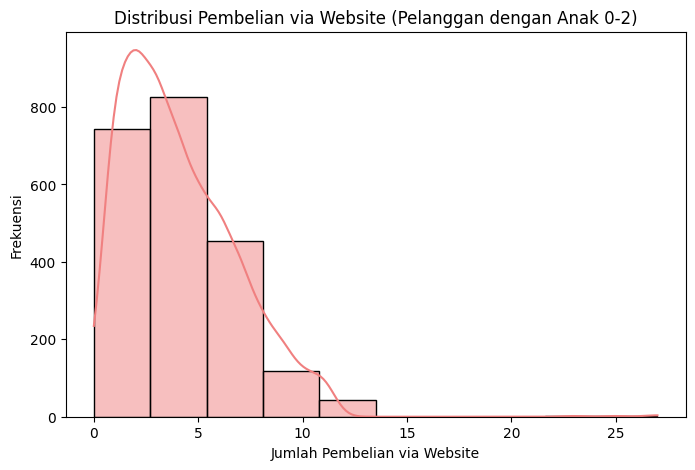

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df_filtered["NumWebPurchases"], bins=10, kde=True, color="lightcoral")

# Tambahkan label
plt.title("Distribusi Pembelian via Website (Pelanggan dengan Anak 0-2)")
plt.xlabel("Jumlah Pembelian via Website")
plt.ylabel("Frekuensi")
plt.show()

dari data diatas terlihat pemebelian pelanggan yang memiliki anak 0 lebih tinggi dibandingkan dengan pelanggan yang memiliki anak 1-2

# ***Z_Score***

In [ ]:
rata_rata_Teenhome = df['Teenhome'].mean()
rata_rata_Teenhome

0.50625

In [ ]:
std_Teenhome = df['Teenhome'].std()
std_Teenhome

0.5445382307698755

In [ ]:
df["z_score_Teenhome"] = (df["Teenhome"] - rata_rata_Teenhome) / std_Teenhome

In [ ]:
df["z_score_Teenhome_flag"] = np.where(abs(df["z_score_Teenhome"]) > 3, "Outlier", "Non-Outlier")
outliers = df[df["z_score_Teenhome_flag"] == "Outlier"]
print(outliers)

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response, NumWebPurchases_std, z_score_Teenhome, z_score_Teenhome_flag]
Index: []


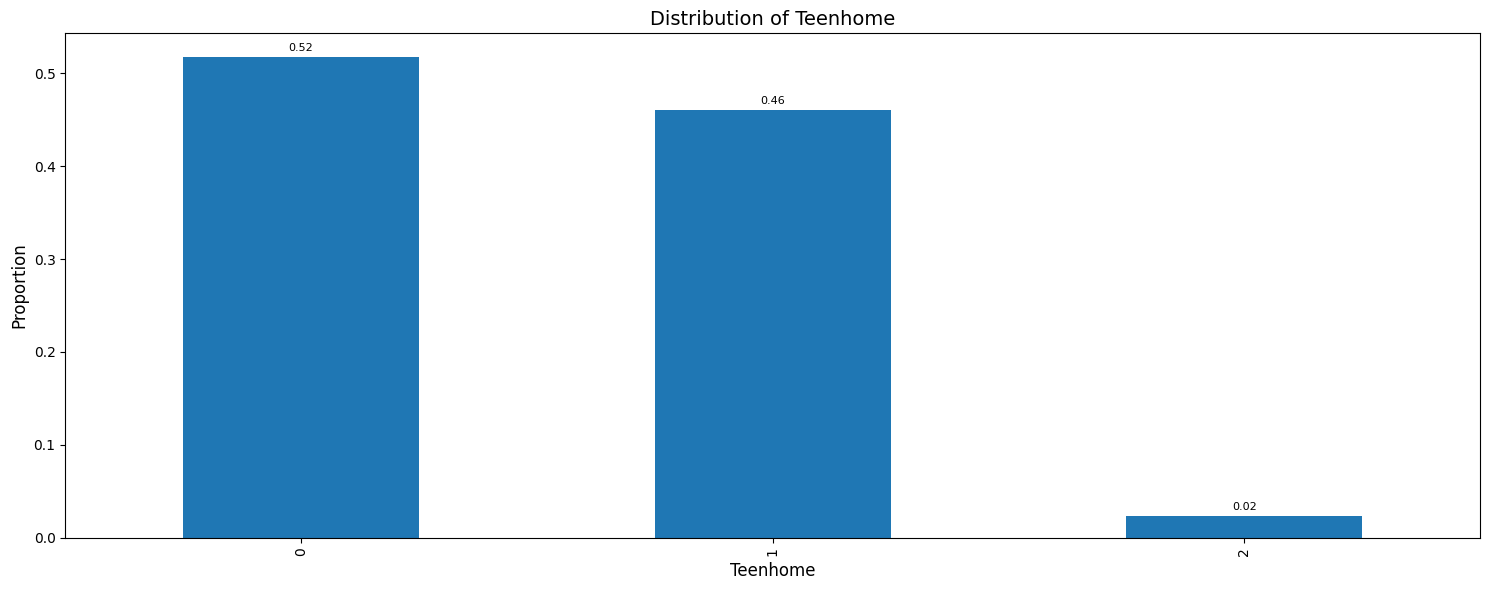

In [ ]:
customer_age = df["Teenhome"].value_counts(normalize=True).sort_index()
ax = customer_age.plot(kind="bar", figsize=(15, 6))  # Menentukan ukuran gambar
ax.set_xlabel("Teenhome", fontsize=12)  # Mengatur ukuran font label x
ax.set_ylabel("Proportion", fontsize=12)  # Memberi label y-axis dan mengatur ukuran font
ax.tick_params(axis='both', which='major', labelsize=10) # Mengatur ukuran font tick
# Tambahkan angka di atas setiap bar dengan format yang lebih baik
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3),  # Menggeser teks sedikit ke atas
                textcoords="offset points",
                ha='center', va='bottom', fontsize=8) # Mengatur ukuran font
plt.title("Distribution of Teenhome", fontsize=14) # Memberi judul dan mengatur ukuran font
plt.tight_layout()  # Menyesuaikan tata letak agar label tidak tumpang tindih
plt.show()

# ***T-Test***

Apakah pembelian produk via website dipengaruhi oleh jumlah anak?

H0 = Tidak ada perbedaan Pembelian produk Via Website oleh pelanggan yang memmiliki anak Remaja  0

H1 = ada perbedaan Pembelian Produk via Website oleh pelanggan yang memmiliki anak Remaja  0

In [ ]:
np.mean(df["NumWebPurchases"])

4.084821428571429

In [ ]:
np.mean(df["Teenhome"])

0.50625

In [ ]:
np.mean(np.mean(df["Teenhome"]-df["NumWebPurchases"]))

-3.5785714285714287

In [ ]:
stats.ttest_ind(df["Teenhome"], df["NumWebPurchases"])

TtestResult(statistic=-59.81454297501842, pvalue=0.0, df=4478.0)

In [ ]:
'''
t_stat, p_value = stats.ttest_ind(df["Teenhome"], df["NumWebPurchases"])
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")
'''

'\nt_stat, p_value = stats.ttest_ind(df["Teenhome"], df["NumWebPurchases"])\nprint(f"T-Statistic: {t_stat}, P-Value: {p_value}")\n'

In [ ]:
'''
# Keputusan
alpha = 0.05
if p_value <= alpha:
    print("Tolak H0")
else:
    print("Gagal menolak H0")
    ''''

SyntaxError: unterminated string literal (detected at line 8) (<ipython-input-36-3d4235d592b6>, line 8)

dari sini terlihat bahwa Pembelian Produk via Website  tidak dipengaruhi oleh jumlah anak dan pendapatan

In [ ]:
from scipy.stats import ttest_ind
group1 = df[df["Teenhome"] == 1]["NumWebPurchases"]
group0 = df[df["Teenhome"] == 0]["NumWebPurchases"]

# Lakukan t-test
t_stat, p_val = ttest_ind(group1, group0, equal_var=False)  # Gunakan Welch’s t-test

t_stat, p_value = stats.ttest_ind(df["Teenhome"], df["NumWebPurchases"])
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.10e}")

T-Statistic: -59.81454297501842, P-Value: 0.0
T-statistic: -59.8145
P-value: 2.8524646362e-13


In [ ]:
# Keputusan
alpha = 0.05
if p_value <= alpha:
    print("Tolak H0")
else:
    print("Gagal menolak H0")

Tolak H0


Hasil uji t menunjukkan bahwa ada perbedaan signifikan dalam pembelian via website berdasarkan jumlah anak remaja.

# ***Chi Square Test***
Tujuan : Menguji hubungan antara dua variabel kategori

In [ ]:
df[['NumWebPurchases','Teenhome']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   NumWebPurchases  2240 non-null   int64
 1   Teenhome         2240 non-null   int64
dtypes: int64(2)
memory usage: 35.1 KB


In [ ]:
encode_table = pd.crosstab(df['NumWebPurchases'], df['Teenhome'])
encode_table

Teenhome,0,1,2
NumWebPurchases,,,
0,29,17,3
1,193,157,4
2,214,152,7
3,207,124,5
4,165,107,8
5,116,101,3
6,84,110,11
7,69,80,6
8,32,69,1


Hipotesis:

H0 : Tidak ada hubungan antara penjualan via webiste dengan junmlah anak remaja

H1 : Ada hubungan antara penjualan via website dengan jumlah anak remaja

In [ ]:
from scipy.stats import chi2_contingency

# Chi-Square Test
chi2, p, dof, expected = chi2_contingency(encode_table)
print(f"Chi-Square: {chi2}, P-Value: {p}")

Chi-Square: 153.63413188312325, P-Value: 2.7203703754808193e-19


In [ ]:
# Keputusan
alpha = 0.05
if p <= alpha:
    print("Tolak H0")
else:
    print("Gagal menolak H0")


Tolak H0


**Kesimpulan**

Ada hubungan yang cukup besar antara penjualan via website dengan jumlah anak remaja ini dikarenakan
p-value(2.72) >= alpha(0.05)

# ***Anova***

Tujuan : Membandingkan rata-rata lebih dari dua kelompok

In [ ]:
from scipy.stats import f_oneway

# Buat grup berdasarkan jumlah anak remaja
group_0 = df[df["Teenhome"] == 0]["NumWebPurchases"]
group_1 = df[df["Teenhome"] == 1]["NumWebPurchases"]
group_2 = df[df["Teenhome"] == 2]["NumWebPurchases"]


# Uji ANOVA
f_stat, p_val = f_oneway(group_0, group_1, group_2)
print(f"F-Statistic: {f_stat}, P-Value: {p_value}")

# Keputusan
alpha = 0.05
if p_value <= alpha:
    print("Tolak H0")
else:
    print("Gagal menolak H0")

F-Statistic: 28.738553016849426, P-Value: 0.0
Tolak H0


kitika menolak H0 (maka Terdapat perbedaan pembelian via website dengan jumlah anak remaja yang dimiliki pelanggan mulai dari 0-2)

# ***Regresi Analisis***
Tujuan : Menguji hubungan antara variabel independen dan variabel dependen

In [ ]:
import statsmodels.api as sm

# Contoh data
X = df['Teenhome']
Y = df['NumWebPurchases']

Dalam regresi linear, kita sering menambahkan kolom konstanta (bias) ke matriks variabel independen X. Fungsi sm.add_constant(X) menambahkan kolom konstanta ke X, yang diperlukan untuk menghitung intercept (titik potong) dalam model regresi linear.

In [ ]:
# Tambahkan konstanta
X = sm.add_constant(X)
X

,const,Teenhome
0,1.0,0
1,1.0,1
2,1.0,0
3,1.0,0
4,1.0,0
...,...,...
2235,1.0,1
2236,1.0,1
2237,1.0,0
2238,1.0,1


sm.OLS(Y, X) membuat model Ordinary Least Squares (OLS) menggunakan variabel dependen Y dan variabel independen X.
.fit() menyesuaikan model OLS ke data, menghitung koefisien regresi yang meminimalkan jumlah kuadrat selisih antara nilai yang diamati dan nilai yang diprediksi.

In [ ]:
# Regresi linear
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

In [ ]:
# Summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        NumWebPurchases   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     55.46
Date:                Thu, 06 Mar 2025   Prob (F-statistic):           1.36e-13
Time:                        05:06:58   Log-Likelihood:                -5439.8
No. Observations:                2240   AIC:                         1.088e+04
Df Residuals:                    2238   BIC:                         1.089e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6831      0.079     46.495      0.0

In [ ]:
# Menampilkan prediksi
print(predictions)

0       3.683114
1       4.476611
2       3.683114
3       3.683114
4       3.683114
          ...   
2235    4.476611
2236    4.476611
2237    3.683114
2238    4.476611
2239    4.476611
Length: 2240, dtype: float64
